In [4]:
pip install pandas wordcloud nltk matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

#import 

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re





In [6]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#Load the dataset
df = pd.read_csv("health_fitness_apps.csv")


In [8]:
#Function to clean text
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'\W+', ' ', text.lower())  # Remove special characters & lowercase
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])


In [9]:
#filter 5 star review
df_filtered = df[df['Rating'] == 5]

In [10]:
#merge all reviews into one text
text_data = ' '.join(df_filtered['App'].astype(str).apply(clean_text))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

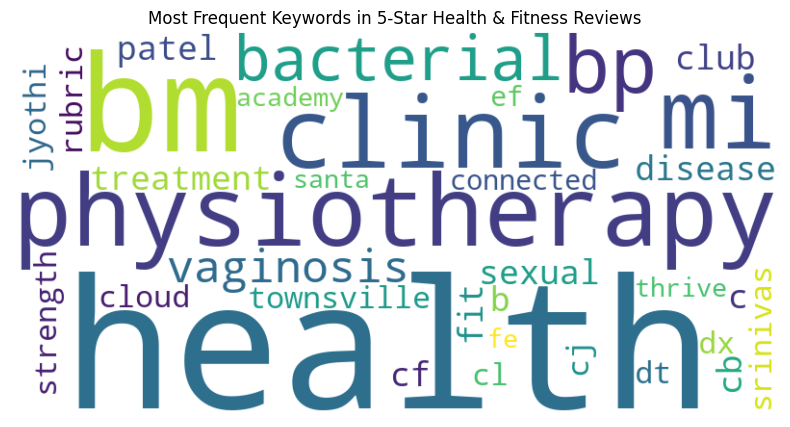

In [11]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Keywords in 5-Star Health & Fitness Reviews")
plt.show()